In [57]:
import sys
sys.path.append('../')

import utils
import networkx as nx
import matplotlib.pyplot as plt

plt.style.use('../style.mpl')

In [58]:
G = utils.load_network(path="../data/network.pkl")
print(G)

Graph with 609 nodes and 18925 edges


Network Info:
- Nodes: 609
- Edges: 18925

========== CLIQUE ANALYSIS ==========
Total number of cliques: 103
Largest clique size: 107
Average clique size: 17.16

Clique size distribution:
Cliques of size 4: 3
Cliques of size 5: 5
Cliques of size 6: 9
Cliques of size 7: 5
Cliques of size 8: 7
Cliques of size 9: 6
Cliques of size 10: 4
Cliques of size 11: 4
Cliques of size 12: 3
Cliques of size 13: 6
Cliques of size 14: 7
Cliques of size 15: 6
Cliques of size 16: 6
Cliques of size 17: 5
Cliques of size 18: 3
Cliques of size 19: 4
Cliques of size 20: 1
Cliques of size 22: 1
Cliques of size 23: 3
Cliques of size 25: 1
Cliques of size 29: 1
Cliques of size 31: 1
Cliques of size 34: 1
Cliques of size 35: 1
Cliques of size 36: 1
Cliques of size 38: 2
Cliques of size 42: 1
Cliques of size 53: 1
Cliques of size 60: 1
Cliques of size 62: 1
Cliques of size 66: 1
Cliques of size 67: 1
Cliques of size 107: 1


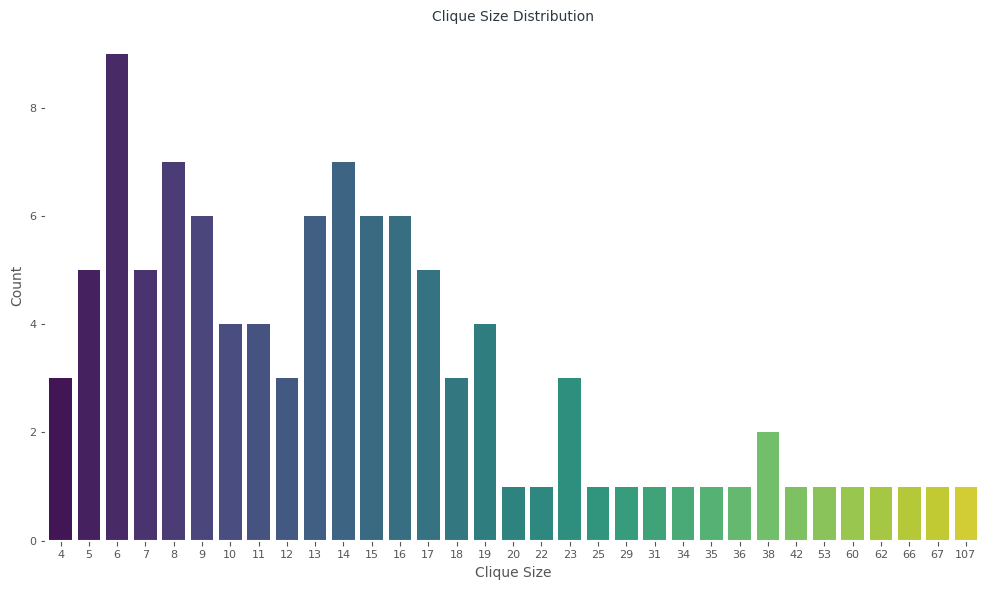


Number of cliques with at least 5 nodes: 100

Largest clique contains 107 artists.


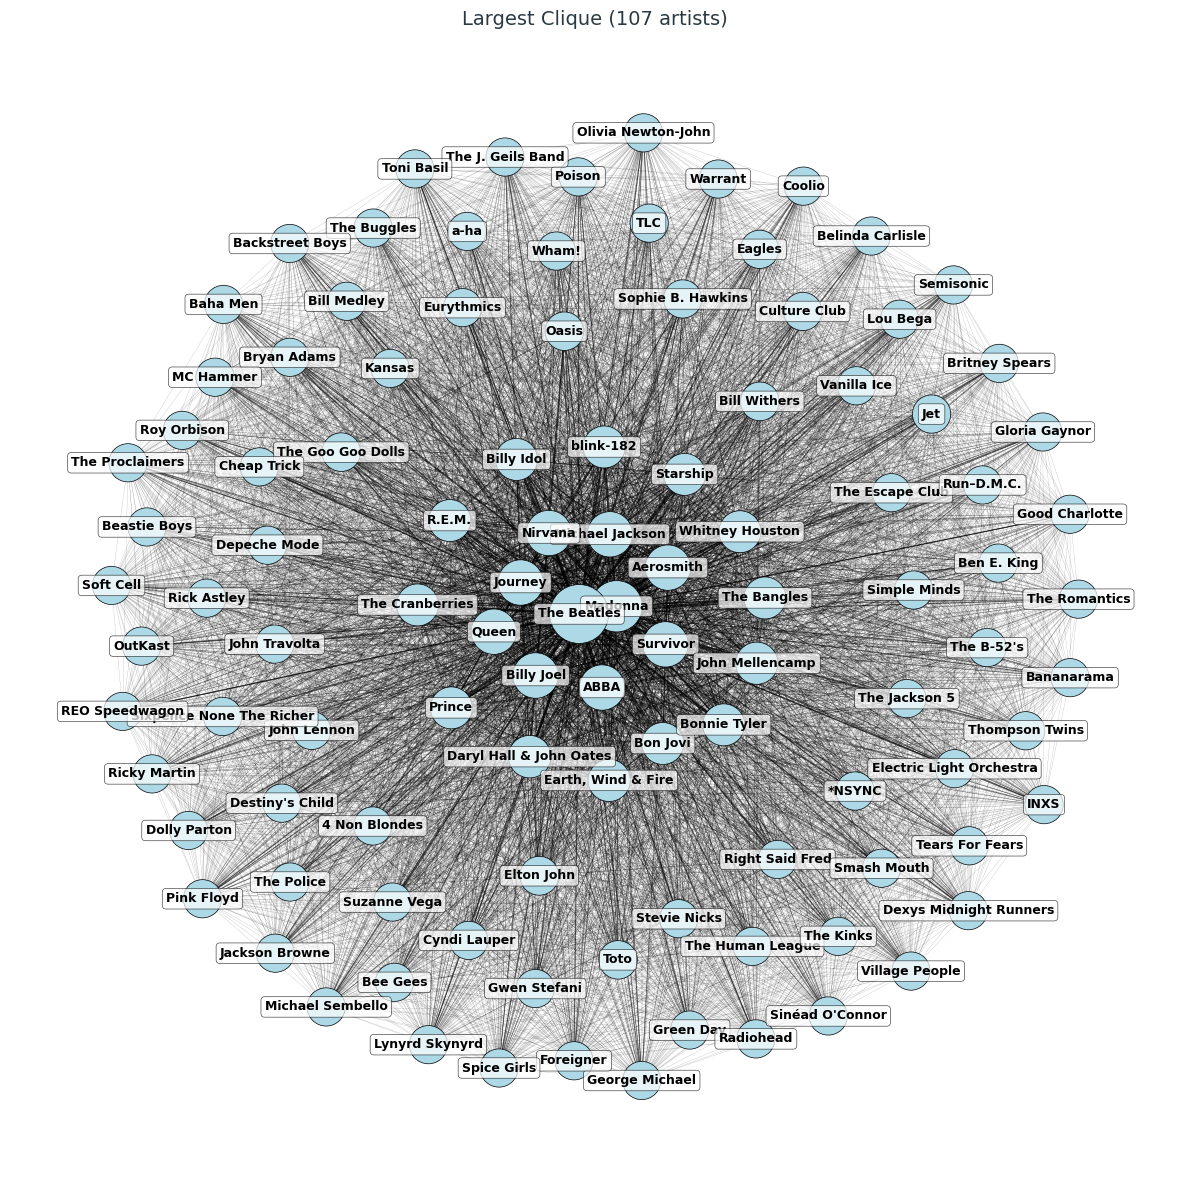


Top 20 artists by size of the largest clique they belong to:
                         Clique Number
Daryl Hall & John Oates            107
Billy Idol                         107
Semisonic                          107
John Lennon                        107
Backstreet Boys                    107
Toto                               107
Ben E. King                        107
Bill Medley                        107
Rick Astley                        107
Starship                           107
Elton John                         107
Tears For Fears                    107
The Jackson 5                      107
Lynyrd Skynyrd                     107
Sophie B. Hawkins                  107
Stevie Nicks                       107
Thompson Twins                     107
Nirvana                            107
Bill Withers                       107
The Kinks                          107

Top 20 artists by number of cliques they participate in:
                    Number of Cliques
Calvin Harris          

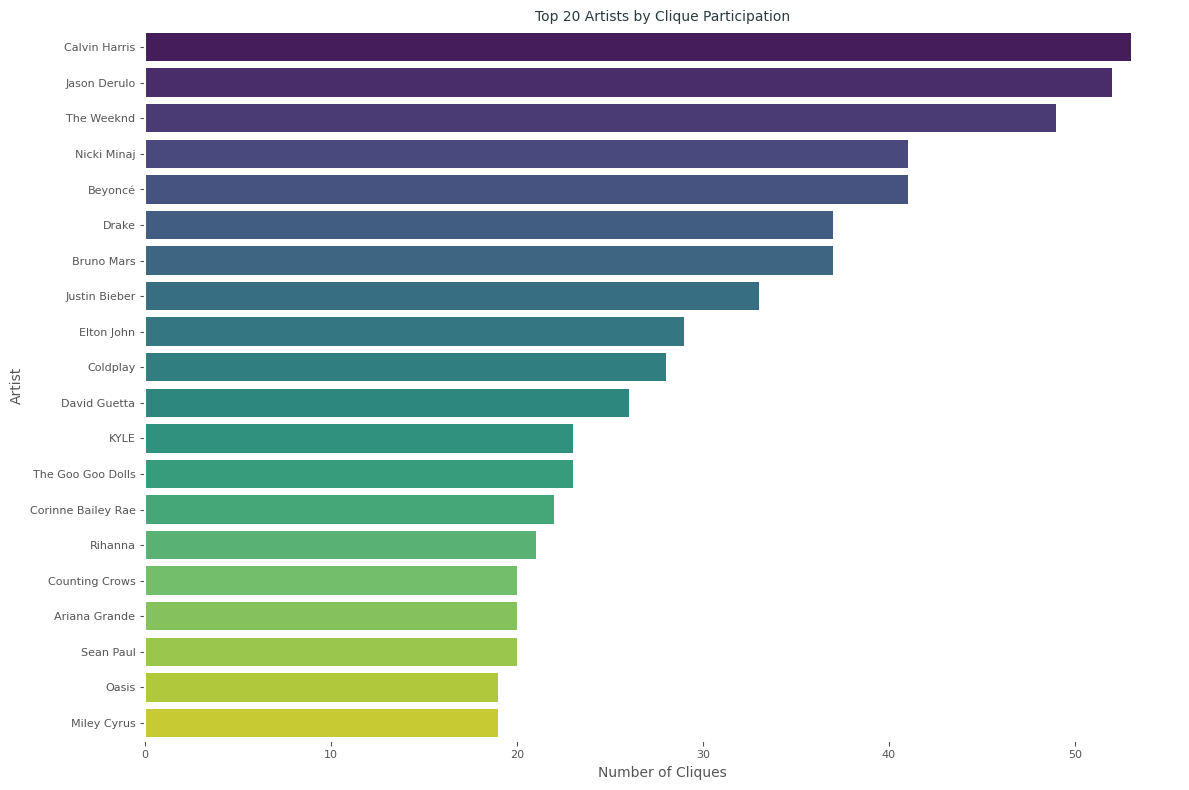


========== CONCLUSIONS ==========
Clique analysis provides key insights into the structure of the Spotify artist network:
1. Cliques represent tightly connected groups of artists, suggesting strong collaborations or common audiences.
2. The clique number of a node indicates the size of the largest fully-connected group it belongs to.
3. The number of cliques a node appears in reflects its versatility and level of connection.
4. Artists with high clique numbers and high clique counts are likely to be versatile or popular across playlists.


In [59]:
plt.style.use('../style.mpl')

# Load the network
G = utils.load_network(path="../data/network.pkl")
print(f"Network Info:\n- Nodes: {G.number_of_nodes()}\n- Edges: {G.number_of_edges()}")

# 1. Clique Analysis
print("\n========== CLIQUE ANALYSIS ==========")

# Find all maximal cliques in the network
cliques = list(nx.find_cliques(G))

# Analyze clique sizes
clique_sizes = [len(c) for c in cliques]
print(f"Total number of cliques: {len(cliques)}")
print(f"Largest clique size: {max(clique_sizes)}")
print(f"Average clique size: {np.mean(clique_sizes):.2f}")

# Count frequency of each clique size
size_counts = Counter(clique_sizes)
print("\nClique size distribution:")
for size, count in sorted(size_counts.items()):
    print(f"Cliques of size {size}: {count}")

# Plot the distribution of clique sizes
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(x=list(size_counts.keys()), y=list(size_counts.values()), ax=ax, palette="viridis")
ax.set_xlabel('Clique Size')
ax.set_ylabel('Count')
ax.set_title('Clique Size Distribution')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../plots/clique_size_distribution.png', transparent=True)
plt.show()

# 2. Analysis of largest k-cliques
k = 5  # Threshold for large cliques
large_cliques = [c for c in cliques if len(c) >= k]
print(f"\nNumber of cliques with at least {k} nodes: {len(large_cliques)}")

if large_cliques:
    # Select and visualize the largest clique
    largest_clique = max(cliques, key=len)
    print(f"\nLargest clique contains {len(largest_clique)} artists.")
    largest_clique_subgraph = G.subgraph(largest_clique)

# Visualize the largest clique
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(largest_clique_subgraph, seed=42, k=0.6)

# Scale node sizes based on weighted degree
node_popularity = dict(largest_clique_subgraph.degree(weight='weight'))
max_pop = max(node_popularity.values()) if node_popularity else 1
node_sizes = [600 + (node_popularity[n] / max_pop) * 1200 for n in largest_clique_subgraph.nodes()]

# Scale edge width based on weights
edge_weights = [largest_clique_subgraph[u][v]['weight'] for u, v in largest_clique_subgraph.edges()]
max_weight = max(edge_weights) if edge_weights else 1
normalized_weights = [w / max_weight * 4 for w in edge_weights]

# Draw the graph
nx.draw_networkx_nodes(largest_clique_subgraph, pos, node_size=node_sizes, node_color='lightblue', edgecolors='black')
nx.draw_networkx_edges(largest_clique_subgraph, pos, width=normalized_weights, edge_color='black', alpha=0.6)
nx.draw_networkx_labels(
    largest_clique_subgraph, pos, font_size=9, font_weight='bold',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.3')
)

plt.title(f"Largest Clique ({len(largest_clique)} artists)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.savefig("../plots/largest_clique.png", transparent=True)
plt.show()

# 3. Clique number per node
node_clique_number = nx.node_clique_number(G)

# Create DataFrame for top nodes
df_clique_numbers = pd.DataFrame.from_dict(node_clique_number, orient='index', columns=['Clique Number'])
df_clique_numbers = df_clique_numbers.sort_values(by='Clique Number', ascending=False)

print("\nTop 20 artists by size of the largest clique they belong to:")
print(df_clique_numbers.head(20))

# 4. Maximal clique participation per node
node_clique_count = {}
for clique in cliques:
    for node in clique:
        node_clique_count[node] = node_clique_count.get(node, 0) + 1

df_clique_counts = pd.DataFrame.from_dict(node_clique_count, orient='index', columns=['Number of Cliques'])
df_clique_counts = df_clique_counts.sort_values(by='Number of Cliques', ascending=False)

print("\nTop 20 artists by number of cliques they participate in:")
print(df_clique_counts.head(20))

# Plot top 20 artists by clique participation
top_clique_artists = df_clique_counts.head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_clique_artists['Number of Cliques'], y=top_clique_artists.index, palette="viridis")
plt.xlabel('Number of Cliques')
plt.ylabel('Artist')
plt.title('Top 20 Artists by Clique Participation')
plt.tight_layout()
plt.savefig('../plots/top_20_clique_participation.png', transparent=True)
plt.show()

# 5. Conclusions
print("\n========== CONCLUSIONS ==========")
print("Clique analysis provides key insights into the structure of the Spotify artist network:")
print("1. Cliques represent tightly connected groups of artists, suggesting strong collaborations or common audiences.")
print("2. The clique number of a node indicates the size of the largest fully-connected group it belongs to.")
print("3. The number of cliques a node appears in reflects its versatility and level of connection.")
print("4. Artists with high clique numbers and high clique counts are likely to be versatile or popular across playlists.")
